<a href="https://colab.research.google.com/github/chienrya8/acled/blob/main/acled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Data

In [31]:
# get local acled data
from google.colab import files
uploaded = files.upload()

Saving Africa_aggregated_data_up_to-2025-10-04.xlsx to Africa_aggregated_data_up_to-2025-10-04.xlsx


In [76]:
# read and preview
import pandas as pd
df = pd.read_excel(
    "Africa_aggregated_data_up_to-2025-10-04.xlsx",
    engine="openpyxl"
)

WEEK           REGION                   COUNTRY    ADMIN1  \
167040 1996-12-28   Western Africa              Sierra Leone  Southern   
35458  1996-12-28    Middle Africa  Central African Republic    Bangui   
241927 1996-12-28   Eastern Africa                    Uganda      Gulu   
6404   1996-12-28  Northern Africa                   Algeria     Saida   
167198 1996-12-28   Western Africa              Sierra Leone  Southern   

                        EVENT_TYPE                SUB_EVENT_TYPE  EVENTS  \
167040                     Battles                   Armed clash       3   
35458                      Battles                   Armed clash       2   
241927                     Battles                   Armed clash       1   
6404    Violence against civilians                        Attack       1   
167198      Strategic developments  Looting/property destruction       3   

        FATALITIES  POPULATION_EXPOSURE           DISORDER_TYPE      ID  \
167040           0                  NaN      Political violence  2783.0   
35458            4                  NaN      Political violence  3773.0   
241927           4                  NaN      Political violence  4015.0   
6404             2                  NaN      Political violence    84.0   
167198           0                  NaN  Strategic developments  2783.0   

        CENTROID_LATITUDE  CENTROID_LONGITUDE  
167040             7.7099            -12.0004  
35458              4.3755             18.5531  
241927             3.0186             32.3885  
6404              34.7465              0.2395  
167198             7.7099            -12.0004

In [81]:
df = df.sort_values(by=["WEEK", "REGION", "COUNTRY"])
df.head(5)

WEEK          REGION                   COUNTRY   ADMIN1  \
163263 1996-12-28  Eastern Africa                    Rwanda     West   
241927 1996-12-28  Eastern Africa                    Uganda     Gulu   
246355 1996-12-28  Eastern Africa                    Uganda  Mityana   
9289   1996-12-28   Middle Africa                    Angola      Bie   
35458  1996-12-28   Middle Africa  Central African Republic   Bangui   

                        EVENT_TYPE SUB_EVENT_TYPE  EVENTS  FATALITIES  \
163263                     Battles    Armed clash       1           1   
241927                     Battles    Armed clash       1           4   
246355                     Battles    Armed clash       1           5   
9289    Violence against civilians         Attack       2          40   
35458                      Battles    Armed clash       2           4   

        POPULATION_EXPOSURE       DISORDER_TYPE      ID  CENTROID_LATITUDE  \
163263                  NaN  Political violence  2653.0            -2.1271   
241927                  NaN  Political violence  4015.0             3.0186   
246355                  NaN  Political violence  4077.0             0.4533   
9289                    NaN  Political violence  3723.0           -12.4421   
35458                   NaN  Political violence  3773.0             4.3755   

        CENTROID_LONGITUDE  
163263             29.3906  
241927             32.3885  
246355             32.0776  
9289               17.4172  
35458              18.5531

In [77]:
# import to geopandas
import geopandas as gpd
geometry = gpd.points_from_xy(df.CENTROID_LONGITUDE, df.CENTROID_LATITUDE)
gdf = gpd.GeoDataFrame(df, geometry = geometry, crs="EPSG:4326")
gdf.head(5)

WEEK           REGION                   COUNTRY    ADMIN1  \
167040 1996-12-28   Western Africa              Sierra Leone  Southern   
35458  1996-12-28    Middle Africa  Central African Republic    Bangui   
241927 1996-12-28   Eastern Africa                    Uganda      Gulu   
6404   1996-12-28  Northern Africa                   Algeria     Saida   
167198 1996-12-28   Western Africa              Sierra Leone  Southern   

                        EVENT_TYPE                SUB_EVENT_TYPE  EVENTS  \
167040                     Battles                   Armed clash       3   
35458                      Battles                   Armed clash       2   
241927                     Battles                   Armed clash       1   
6404    Violence against civilians                        Attack       1   
167198      Strategic developments  Looting/property destruction       3   

        FATALITIES  POPULATION_EXPOSURE           DISORDER_TYPE      ID  \
167040           0                  NaN      Political violence  2783.0   
35458            4                  NaN      Political violence  3773.0   
241927           4                  NaN      Political violence  4015.0   
6404             2                  NaN      Political violence    84.0   
167198           0                  NaN  Strategic developments  2783.0   

        CENTROID_LATITUDE  CENTROID_LONGITUDE                 geometry  
167040             7.7099            -12.0004  POINT (-12.0004 7.7099)  
35458              4.3755             18.5531   POINT (18.5531 4.3755)  
241927             3.0186             32.3885   POINT (32.3885 3.0186)  
6404              34.7465              0.2395   POINT (0.2395 34.7465)  
167198             7.7099            -12.0004  POINT (-12.0004 7.7099)

**Basic Data Exploration**

# Basic Data Exploration

In [78]:
df.describe()

WEEK         EVENTS     FATALITIES  \
count                         254680  254680.000000  254680.000000   
mean   2018-01-03 04:06:00.395790592       1.757240       4.136289   
min              1996-12-28 00:00:00       1.000000       0.000000   
25%              2014-11-08 00:00:00       1.000000       0.000000   
50%              2020-01-11 00:00:00       1.000000       0.000000   
75%              2023-02-11 00:00:00       2.000000       1.000000   
max              2025-10-04 00:00:00      92.000000   12268.000000   
std                              NaN       2.043107      65.831132   

       POPULATION_EXPOSURE             ID  CENTROID_LATITUDE  \
count         1.080560e+05  254677.000000      254680.000000   
mean          3.641424e+04    2406.896488           6.526910   
min           1.000000e+00      47.000000         -32.635100   
25%           4.428000e+03    1543.000000          -0.236200   
50%           1.313600e+04    3023.000000           6.538000   
75%           3.477300e+04    3338.000000          12.909300   
max           3.118803e+06    4169.000000          37.036300   
std           7.953109e+04    1193.222293          14.838192   

       CENTROID_LONGITUDE  
count       254680.000000  
mean            21.376255  
min            -25.197600  
25%              7.188300  
50%             26.590300  
75%             33.396700  
max             72.420800  
std             16.933404

In [38]:
df.REGION.unique()

array(['Northern Africa', 'Middle Africa', 'Western Africa',
       'Southern Africa', 'Eastern Africa'], dtype=object)

In [43]:
df.COUNTRY.unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana',
       'British Indian Ocean Territory', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'Comoros', 'Democratic Republic of Congo', 'Djibouti', 'Egypt',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya',
       'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Mayotte', 'Morocco', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Republic of Congo', 'Reunion',
       'Rwanda', 'Saint Helena, Ascension and Tristan da Cunha',
       'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone',
       'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania',
       'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'eSwatini'],
      dtype=object)

In [49]:
df.DISORDER_TYPE.unique()

array(['Political violence', 'Demonstrations', 'Strategic developments',
       'Political violence; Demonstrations'], dtype=object)

In [82]:
df.groupby(["WEEK", "REGION", "COUNTRY"]).count()

ADMIN1  EVENT_TYPE  \
WEEK       REGION          COUNTRY                                        
1996-12-28 Eastern Africa  Rwanda                         1           1   
                           Uganda                         2           2   
           Middle Africa   Angola                         1           1   
                           Central African Republic       1           1   
           Northern Africa Algeria                        3           3   
...                                                     ...         ...   
2025-10-04 Western Africa  Liberia                        1           1   
                           Mali                          28          28   
                           Mauritania                     2           2   
                           Niger                          3           3   
                           Nigeria                       47          47   

                                                     SUB_EVENT_TYPE  EVENTS  \
WEEK       REGION          COUNTRY                                            
1996-12-28 Eastern Africa  Rwanda                                 1       1   
                           Uganda                                 2       2   
           Middle Africa   Angola                                 1       1   
                           Central African Republic               1       1   
           Northern Africa Algeria                                3       3   
...                                                             ...     ...   
2025-10-04 Western Africa  Liberia                                1       1   
                           Mali                                  28      28   
                           Mauritania                             2       2   
                           Niger                                  3       3   
                           Nigeria                               47      47   

                                                     FATALITIES  \
WEEK       REGION          COUNTRY                                
1996-12-28 Eastern Africa  Rwanda                             1   
                           Uganda                             2   
           Middle Africa   Angola                             1   
                           Central African Republic           1   
           Northern Africa Algeria                            3   
...                                                         ...   
2025-10-04 Western Africa  Liberia                            1   
                           Mali                              28   
                           Mauritania                         2   
                           Niger                              3   
                           Nigeria                           47   

                                                     POPULATION_EXPOSURE  \
WEEK       REGION          COUNTRY                                         
1996-12-28 Eastern Africa  Rwanda                                      0   
                           Uganda                                      0   
           Middle Africa   Angola                                      0   
                           Central African Republic                    0   
           Northern Africa Algeria                                     0   
...                                                                  ...   
2025-10-04 Western Africa  Liberia                                     1   
                           Mali                                       17   
                           Mauritania                                  2   
                           Niger                                       3   
                           Nigeria                                    36   

                                                     DISORDER_TYPE  ID  \
WEEK       REGION          COUNTRY                                       
1996-12-28 Eastern Africa  Rwanda       

... we have unobserved variable problem - not all countries have all timestamp observations

In [84]:
df[df.WEEK=="1996-12-28"].COUNTRY.unique()

array(['Rwanda', 'Uganda', 'Angola', 'Central African Republic',
       'Algeria', 'Egypt', 'Libya', 'Sudan', 'Sierra Leone'], dtype=object)

In [86]:
df[df.WEEK=="2025-10-04"].COUNTRY.unique()

array(['Burundi', 'Comoros', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi',
       'Mauritius', 'Mozambique', 'Somalia', 'South Sudan', 'Tanzania',
       'Uganda', 'Cameroon', 'Central African Republic', 'Chad',
       'Democratic Republic of Congo', 'Gabon', 'Algeria', 'Egypt',
       'Libya', 'Morocco', 'Sudan', 'Tunisia', 'Namibia', 'South Africa',
       'Zambia', 'eSwatini', 'Benin', 'Burkina Faso', 'Cape Verde',
       'Ghana', 'Guinea', 'Ivory Coast', 'Liberia', 'Mali', 'Mauritania',
       'Niger', 'Nigeria'], dtype=object)

In [96]:
import folium
from folium.plugins import HeatMapWithTime
import json

def map_acled_year_slider_with_markers(gdf,):
    """
    Create map with markers grouped by year and layer control.
    Better for seeing individual events.

    Parameters:
    -----------
    gdf : GeoDataFrame
        ACLED geodataframe

    Returns:
    --------
    folium.Map : The map object
    """

    # Convert to datetime
    gdf['date'] = pd.to_datetime(gdf['WEEK'])

    # Extract year
    gdf['year'] = gdf['date'].dt.year

    # Get unique years
    years = sorted(gdf['year'].unique())

    # Create base map
    m = folium.Map(location=[0, 20], zoom_start=3, tiles='OpenStreetMap')

    print(f"Processing {len(years)} years...")

    # Color palette for years
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'darkblue',
              'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'gray']

    for idx, year in enumerate(years):
        color = colors[idx % len(colors)]

        # Create feature group for this year
        fg = folium.FeatureGroup(name=f'{year}', show=(idx == len(years) - 1))  # Show most recent year by default

        # Get data for this year
        year_data = gdf[gdf['year'] == year]

        event_count = len(year_data)
        print(f"  {year}: {event_count} events")

        # Add markers for each event
        for jdx, row in year_data.iterrows():
            coords = [row.geometry.y, row.geometry.x]

            # Get event details
            event_type = row.get('event_type', 'Unknown')
            country = row.get('country', 'Unknown')
            date_str = str(row['date'].date())

            popup_text = f"""
            <b>Year:</b> {year}<br>
            <b>Date:</b> {date_str}<br>
            <b>Country:</b> {country}<br>
            <b>Event Type:</b> {event_type}
            """

            folium.CircleMarker(
                location=coords,
                radius=5,
                popup=folium.Popup(popup_text, max_width=250),
                color=color,
                fill=True,
                fillColor=color,
                fillOpacity=0.7,
                weight=2
            ).add_to(fg)

        fg.add_to(m)

    # Add layer control
    folium.LayerControl(collapsed=False, position='topleft').add_to(m)

    # Add title
    title_html = '''
    <div style="position: fixed;
                bottom: 10px; right: 10px; width: 280px; height: 80px;
                background-color: white; border:2px solid grey; z-index:9999;
                font-size:12px; padding: 10px; border-radius: 5px;">
        <b>ACLED Africa by Year</b><br>
        Toggle years on/off using the layer control.<br>
        Click markers for event details.
    </div>
    '''
    m.get_root().html.add_child(folium.Element(title_html))

    display(m)

map_acled_year_slider_with_markers(gdf[gdf.REGION=="Northern Africa"].head(3000))

Processing 10 years...
  1996: 7 events
  1997: 315 events
  1998: 239 events
  1999: 234 events
  2000: 356 events
  2001: 347 events
  2002: 466 events
  2003: 356 events
  2004: 454 events
  2005: 226 events


# Feature Engineering

**Analyze**

Violence self-correlation:
- ... can we fit a model to identify anomalous fatalities?
- ... fit model where y=fatalities_region_wk_t and x={features}_region_wk_t-1

Violence neighbor-correlation:
- ... which regions are correlated to others?
- ... fit model where y=fatalities_region_wk_t and x={features}_notregion_wk_t-1

Y vars:
* FATALITIES: int

X vars:
* FATALITIES: int
* EVENTS: int
* POPULATION_EXPOSURE: int (control)
* EVENT_TYPE: cat
* DISORDER_TYPE: cat

Feature descriptions: https://acleddata.com/methodology/acled-codebook#event-types-table

In [101]:
# generate categoricals through one hot encoding
CATEGORICAL_COLS = ["EVENT_TYPE", "DISORDER_TYPE"]
df_cat = pd.get_dummies(df, columns=CATEGORICAL_COLS)
df_cat.head(5)

WEEK          REGION                   COUNTRY   ADMIN1  \
163263 1996-12-28  Eastern Africa                    Rwanda     West   
241927 1996-12-28  Eastern Africa                    Uganda     Gulu   
246355 1996-12-28  Eastern Africa                    Uganda  Mityana   
9289   1996-12-28   Middle Africa                    Angola      Bie   
35458  1996-12-28   Middle Africa  Central African Republic   Bangui   

       SUB_EVENT_TYPE  EVENTS  FATALITIES  POPULATION_EXPOSURE      ID  \
163263    Armed clash       1           1                  NaN  2653.0   
241927    Armed clash       1           4                  NaN  4015.0   
246355    Armed clash       1           5                  NaN  4077.0   
9289           Attack       2          40                  NaN  3723.0   
35458     Armed clash       2           4                  NaN  3773.0   

        CENTROID_LATITUDE  ...  EVENT_TYPE_Battles  \
163263            -2.1271  ...                True   
241927             3.0186  ...                True   
246355             0.4533  ...                True   
9289             -12.4421  ...               False   
35458              4.3755  ...                True   

        EVENT_TYPE_Explosions/Remote violence  EVENT_TYPE_Protests  \
163263                                  False                False   
241927                                  False                False   
246355                                  False                False   
9289                                    False                False   
35458                                   False                False   

        EVENT_TYPE_Riots  EVENT_TYPE_Strategic developments  \
163263             False                              False   
241927             False                              False   
246355             False                              False   
9289               False                              False   
35458              False                              False   

        EVENT_TYPE_Violence against civilians  DISORDER_TYPE_Demonstrations  \
163263                                  False                         False   
241927                                  False                         False   
246355                                  False                         False   
9289                                     True                         False   
35458                                   False                         False   

        DISORDER_TYPE_Political violence  \
163263                              True   
241927                              True   
246355                              True   
9289                                True   
35458                               True   

        DISORDER_TYPE_Political violence; Demonstrations  \
163263                                             False   
241927                                             False   
246355                                             False   
9289                                               False   
35458                                              False   

        DISORDER_TYPE_Strategic developments  
163263                                 False  
241927                                 False  
246355                                 False  
9289                                   False  
35458                                  False  

[5 rows x 21 columns]

In [103]:
df_cat.columns

Index(['WEEK', 'REGION', 'COUNTRY', 'ADMIN1', 'SUB_EVENT_TYPE', 'EVENTS',
       'FATALITIES', 'POPULATION_EXPOSURE', 'ID', 'CENTROID_LATITUDE',
       'CENTROID_LONGITUDE', 'EVENT_TYPE_Battles',
       'EVENT_TYPE_Explosions/Remote violence', 'EVENT_TYPE_Protests',
       'EVENT_TYPE_Riots', 'EVENT_TYPE_Strategic developments',
       'EVENT_TYPE_Violence against civilians', 'DISORDER_TYPE_Demonstrations',
       'DISORDER_TYPE_Political violence',
       'DISORDER_TYPE_Political violence; Demonstrations',
       'DISORDER_TYPE_Strategic developments'],
      dtype='object')

In [134]:
idx = sum([df_cat.columns.str.startswith(cat) for cat in CATEGORICAL_COLS])
idx = [bool(i) for i in idx]

In [184]:
# now aggregate by week, country
GROUP_COLS = ["WEEK", "COUNTRY"]
one_hot_idx = sum([df_cat.columns.str.startswith(cat) for cat in CATEGORICAL_COLS])
one_hot_idx = [bool(i) for i in one_hot_idx]
ONE_HOT_COLS = df_cat.columns.values[one_hot_idx].tolist()
FEATURE_COLS = ["FATALITIES", "EVENTS", "POPULATION_EXPOSURE"] + ONE_HOT_COLS
df_agg = df_cat.groupby(GROUP_COLS)[FEATURE_COLS].sum()
df_agg = df_agg.reset_index()
df_agg.head(5)

WEEK                   COUNTRY  FATALITIES  EVENTS  \
0 1996-12-28                   Algeria           9       3   
1 1996-12-28                    Angola          40       2   
2 1996-12-28  Central African Republic           4       2   
3 1996-12-28                     Egypt           1       1   
4 1996-12-28                     Libya           8       1   

   POPULATION_EXPOSURE  EVENT_TYPE_Battles  \
0                  0.0                   0   
1                  0.0                   0   
2                  0.0                   1   
3                  0.0                   1   
4                  0.0                   0   

   EVENT_TYPE_Explosions/Remote violence  EVENT_TYPE_Protests  \
0                                      0                    0   
1                                      0                    0   
2                                      0                    0   
3                                      0                    0   
4                                      0                    0   

   EVENT_TYPE_Riots  EVENT_TYPE_Strategic developments  \
0                 0                                  0   
1                 0                                  0   
2                 0                                  0   
3                 0                                  0   
4                 0                                  0   

   EVENT_TYPE_Violence against civilians  DISORDER_TYPE_Demonstrations  \
0                                      3                             0   
1                                      1                             0   
2                                      0                             0   
3                                      0                             0   
4                                      1                             0   

   DISORDER_TYPE_Political violence  \
0                                 3   
1                                 1   
2                                 1   
3                                 1   
4                                 1   

   DISORDER_TYPE_Political violence; Demonstrations  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   DISORDER_TYPE_Strategic developments  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0

In [188]:
# now fill in missing observations with 0
def fill_missing_weeks_multiindex(df, group_col, date_col, value_col):
    """
    Fill missing week observations with zero using MultiIndex.

    Parameters:
    -----------
    df : DataFrame
        Input dataframe with date column
    group_col : str
        Column to group by (e.g., 'country', 'region')
    date_col : str
        Date column name
    value_col : str or list
        Value column(s) to aggregate/fill

    Returns:
    --------
    DataFrame : Reindexed dataframe with missing weeks filled as zero

    Example:
    --------
    df_filled = fill_missing_weeks_multiindex(df, 'country', 'date', 'events')
    """

    # Convert to datetime
    df[date_col] = pd.to_datetime(df[date_col])

    # Extract year and week
    df['year'] = df[date_col].dt.year
    df['week'] = df[date_col].dt.isocalendar().week
    df['year_week'] = df['year'].astype(str) + '-W' + df['week'].astype(str).str.zfill(2)

    # Group by group_col and year_week, then sum values
    grouped = df.groupby([group_col, 'year_week'])[value_col].sum().reset_index()

    # Create MultiIndex
    grouped = grouped.set_index([group_col, 'year_week'])

    # Get all unique groups and weeks
    groups = grouped.index.get_level_values(0).unique()
    weeks = sorted(grouped.index.get_level_values(1).unique())

    # Create complete MultiIndex
    complete_index = pd.MultiIndex.from_product(
        [groups, weeks],
        names=[group_col, 'year_week']
    )

    # Reindex and fill missing values with 0
    grouped_filled = grouped.reindex(complete_index, fill_value=0)

    # Reset index to get back to regular columns
    result = grouped_filled.reset_index()

    return result

df_agg_fill = fill_missing_weeks_multiindex(df_agg, "COUNTRY", "WEEK", FEATURE_COLS)
df_agg_fill.head(5)

COUNTRY year_week  FATALITIES  EVENTS  POPULATION_EXPOSURE  \
0  Algeria  1996-W52           9       3                  0.0   
1  Algeria  1997-W01          90       9                  0.0   
2  Algeria  1997-W02          89      10                  0.0   
3  Algeria  1997-W03         226      13                  0.0   
4  Algeria  1997-W04          51       7                  0.0   

   EVENT_TYPE_Battles  EVENT_TYPE_Explosions/Remote violence  \
0                   0                                      0   
1                   2                                      2   
2                   2                                      1   
3                   1                                      2   
4                   1                                      1   

   EVENT_TYPE_Protests  EVENT_TYPE_Riots  EVENT_TYPE_Strategic developments  \
0                    0                 0                                  0   
1                    0                 0                                  0   
2                    0                 0                                  0   
3                    0                 0                                  0   
4                    0                 0                                  0   

   EVENT_TYPE_Violence against civilians  DISORDER_TYPE_Demonstrations  \
0                                      3                             0   
1                                      4                             0   
2                                      4                             0   
3                                      2                             0   
4                                      3                             0   

   DISORDER_TYPE_Political violence  \
0                                 3   
1                                 8   
2                                 7   
3                                 5   
4                                 5   

   DISORDER_TYPE_Political violence; Demonstrations  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   DISORDER_TYPE_Strategic developments  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0

In [189]:
df_agg[df_agg.COUNTRY=='Angola'].shape

(761, 18)

In [190]:
df_agg_fill[df_agg_fill.COUNTRY=='Angola'].shape

(1499, 15)

In [191]:
# Problem solved for missing observations
df_agg_fill[df_agg_fill.COUNTRY=='Angola'].shape == \
  df_agg_fill[df_agg_fill.COUNTRY=='Sudan'].shape

True

In [192]:
# which countries have most observations?
K = 10
top_k_countries = df_agg.groupby("COUNTRY")["WEEK"].count() \
    .sort_values(ascending=False).head(K).index.tolist()
top_k_countries

['Sudan',
 'Democratic Republic of Congo',
 'Nigeria',
 'Kenya',
 'Algeria',
 'South Africa',
 'Somalia',
 'Uganda',
 'Zimbabwe',
 'Burundi']

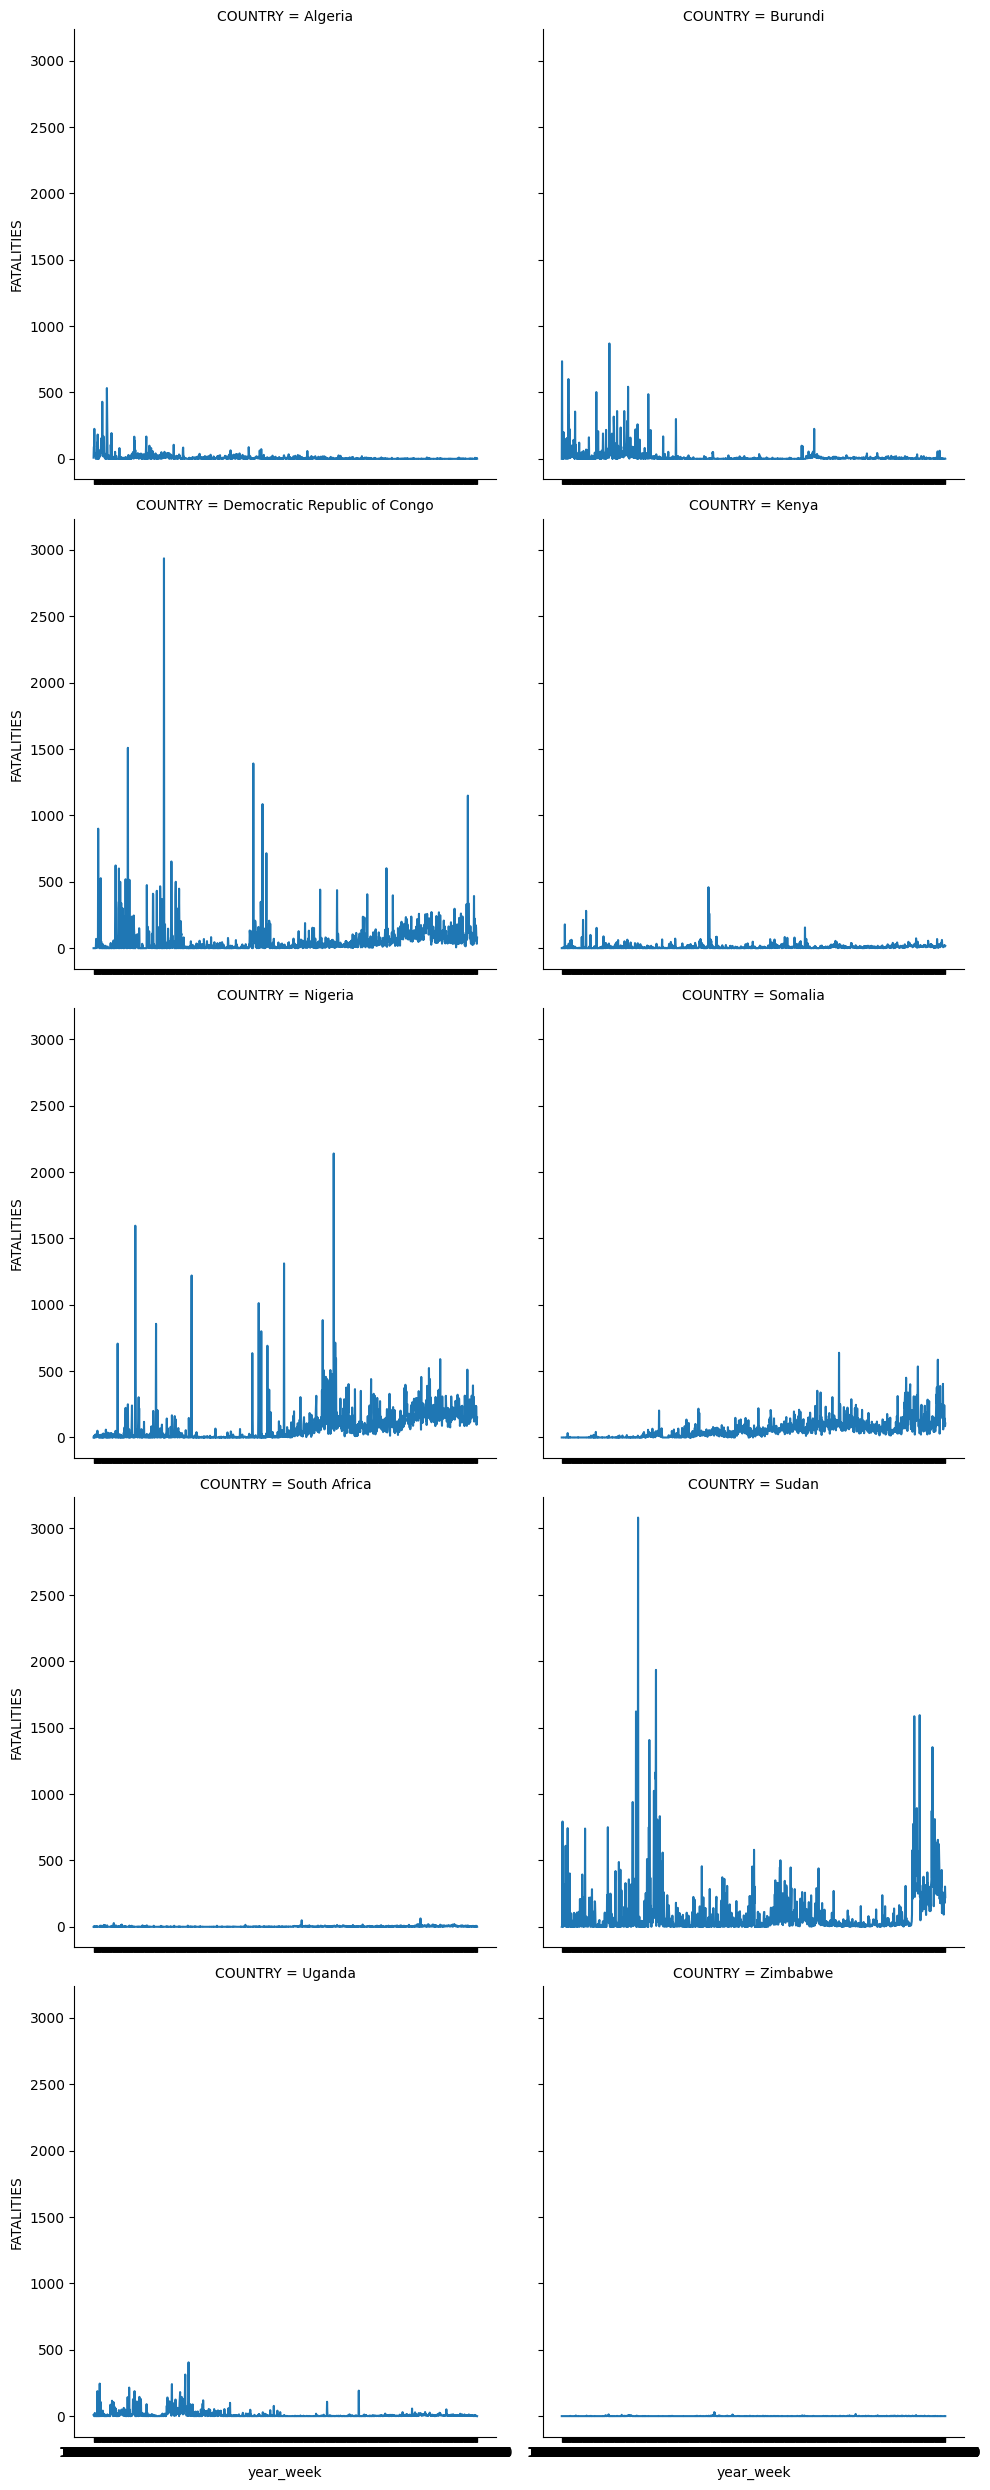

In [194]:
# is there any time-series signal? check via plotting
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(data=df_agg_fill[df_agg_fill.COUNTRY.isin(top_k_countries)],
            x="year_week", y="FATALITIES", col="COUNTRY", kind="line",
            col_wrap=2)


In [200]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# run standard scaler
def scale_by_country_groupby(df, country_col='COUNTRY', scale_cols=None):
    """
    Alternative approach using groupby (more efficient).

    Parameters:
    -----------
    df : DataFrame
        Input dataframe
    country_col : str
        Country column name
    scale_cols : list or None
        Columns to scale

    Returns:
    --------
    DataFrame : Dataframe with scaled columns
    """

    df_copy = df.copy()

    # Select columns to scale
    if scale_cols is None:
        exclude_cols = [country_col, 'year_week']
        scale_cols = df_copy.select_dtypes(include=[np.number]).columns.tolist()
        scale_cols = [col for col in scale_cols if col not in exclude_cols]

    print(f"Scaling columns: {scale_cols}")
    print(f"Number of countries: {df_copy[country_col].nunique()}\n")

    scaler = StandardScaler()

    # Scale each column by country using groupby
    all_scaled_col_names = []
    for col in scale_cols:
        scaled_col_name = f"{col}_scaled"
        all_scaled_col_names.append(scaled_col_name)
        # Apply scaler to each country group
        df_copy[scaled_col_name] = df_copy.groupby(country_col)[col].transform(
            lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
        )

        print(f"✓ Scaled {col}")

    return df_copy, all_scaled_col_names

df_agg_fill_feat, scaled_feat_cols = scale_by_country_groupby(
    df_agg_fill,
    country_col="COUNTRY",
    scale_cols=FEATURE_COLS
)

Scaling columns: ['FATALITIES', 'EVENTS', 'POPULATION_EXPOSURE', 'EVENT_TYPE_Battles', 'EVENT_TYPE_Explosions/Remote violence', 'EVENT_TYPE_Protests', 'EVENT_TYPE_Riots', 'EVENT_TYPE_Strategic developments', 'EVENT_TYPE_Violence against civilians', 'DISORDER_TYPE_Demonstrations', 'DISORDER_TYPE_Political violence', 'DISORDER_TYPE_Political violence; Demonstrations', 'DISORDER_TYPE_Strategic developments']
Number of countries: 58

✓ Scaled FATALITIES
✓ Scaled EVENTS
✓ Scaled POPULATION_EXPOSURE
✓ Scaled EVENT_TYPE_Battles
✓ Scaled EVENT_TYPE_Explosions/Remote violence
✓ Scaled EVENT_TYPE_Protests
✓ Scaled EVENT_TYPE_Riots
✓ Scaled EVENT_TYPE_Strategic developments
✓ Scaled EVENT_TYPE_Violence against civilians
✓ Scaled DISORDER_TYPE_Demonstrations
✓ Scaled DISORDER_TYPE_Political violence
✓ Scaled DISORDER_TYPE_Political violence; Demonstrations
✓ Scaled DISORDER_TYPE_Strategic developments


In [205]:
df_agg_fill_feat[GROUP_COLS+scaled_feat_cols]

Index(['COUNTRY', 'year_week', 'FATALITIES', 'EVENTS', 'POPULATION_EXPOSURE',
       'EVENT_TYPE_Battles', 'EVENT_TYPE_Explosions/Remote violence',
       'EVENT_TYPE_Protests', 'EVENT_TYPE_Riots',
       'EVENT_TYPE_Strategic developments',
       'EVENT_TYPE_Violence against civilians', 'DISORDER_TYPE_Demonstrations',
       'DISORDER_TYPE_Political violence',
       'DISORDER_TYPE_Political violence; Demonstrations',
       'DISORDER_TYPE_Strategic developments', 'FATALITIES_scaled',
       'EVENTS_scaled', 'POPULATION_EXPOSURE_scaled',
       'EVENT_TYPE_Battles_scaled',
       'EVENT_TYPE_Explosions/Remote violence_scaled',
       'EVENT_TYPE_Protests_scaled', 'EVENT_TYPE_Riots_scaled',
       'EVENT_TYPE_Strategic developments_scaled',
       'EVENT_TYPE_Violence against civilians_scaled',
       'DISORDER_TYPE_Demonstrations_scaled',
       'DISORDER_TYPE_Political violence_scaled',
       'DISORDER_TYPE_Political violence; Demonstrations_scaled',
       'DISORDER_TYPE_Strategic